In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
# Carga de datos 
#df = pd.read_csv('../data/period_sem_table.csv')
dfBeta = pd.read_csv('../data/period_sem_table_modified.csv')
df = dfBeta.round()

In [3]:
df

,periodo_1,periodo_2,periodo_3,periodo_4,periodo_5,periodo_6,periodo_7,periodo_8,periodo_9,periodo_10,...,periodo_13,periodo_14,periodo_15,periodo_16,periodo_17,periodo_18,periodo_19,periodo_20,periodo_21,periodo_22
0,3.0,2.0,3.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,...,3.0,4.0,3.0,4.0,3.0,3.0,3.0,6.0,3.0,3.0
1,15.0,24.0,19.0,19.0,19.0,32.0,14.0,26.0,22.0,25.0,...,20.0,22.0,21.0,22.0,24.0,30.0,23.0,26.0,21.0,23.0
2,18.0,19.0,22.0,18.0,18.0,18.0,24.0,14.0,13.0,15.0,...,21.0,18.0,19.0,18.0,20.0,19.0,24.0,23.0,24.0,20.0
3,12.0,13.0,17.0,18.0,18.0,18.0,17.0,23.0,22.0,13.0,...,16.0,18.0,18.0,18.0,19.0,20.0,18.0,24.0,18.0,18.0
4,18.0,14.0,12.0,12.0,12.0,17.0,18.0,16.0,18.0,12.0,...,18.0,12.0,17.0,12.0,18.0,18.0,18.0,18.0,17.0,14.0
5,14.0,12.0,12.0,12.0,12.0,12.0,14.0,18.0,14.0,14.0,...,12.0,12.0,12.0,12.0,12.0,18.0,12.0,18.0,22.0,18.0
6,14.0,14.0,12.0,13.0,14.0,12.0,12.0,12.0,19.0,12.0,...,16.0,10.0,18.0,13.0,18.0,12.0,18.0,18.0,18.0,17.0
7,13.0,13.0,10.0,15.0,15.0,12.0,11.0,12.0,13.0,12.0,...,15.0,15.0,15.0,15.0,17.0,18.0,14.0,12.0,11.0,14.0
8,9.0,9.0,9.0,2.0,2.0,7.0,6.0,5.0,4.0,6.0,...,13.0,11.0,11.0,11.0,10.0,11.0,11.0,16.0,14.0,10.0


In [26]:
# # Crea un boxplot para cada columna
# for column in df:
#   plt.figure()
#   plt.boxplot(df[column])
#   plt.title(column)
#   plt.show()

In [4]:
# Entrenamiento
X = df.iloc[:,0:21] # Columnas de periodos 1-22
y = df.iloc[:,21] # Periodo 22 como target

In [28]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [29]:
# Predicciones para periodo 23 
predictions = rf.predict(X)

In [30]:
# Mostrar predicciones
for i in range(9):
  print(f"Semestre {i+1}: {predictions[i]}")

Semestre 1: 5.87
Semestre 2: 21.16
Semestre 3: 19.55
Semestre 4: 17.77
Semestre 5: 15.22
Semestre 6: 17.0
Semestre 7: 16.21
Semestre 8: 14.5
Semestre 9: 11.21


In [31]:
# Redondea los valores del array al entero más cercano
rounded_arr = np.around(predictions)

# Imprime el array redondeado
#print(rounded_arr)

for i in range(9):
  print(f"Semestre {i+1}: {rounded_arr[i]}")

Semestre 1: 6.0
Semestre 2: 21.0
Semestre 3: 20.0
Semestre 4: 18.0
Semestre 5: 15.0
Semestre 6: 17.0
Semestre 7: 16.0
Semestre 8: 14.0
Semestre 9: 11.0


In [32]:
#GUARDAR SALIDA EN ARCHIVO   CSV
import csv

# Nombre del archivo CSV
archivo_csv = "resultados.csv"

# Generar los mensajes y guardarlos en una lista
messages = []
for i in range(9):
    message = f"Semestre {i+1}: {rounded_arr[i]}"
    messages.append([message])

# Guardar los mensajes en el archivo CSV
with open(archivo_csv, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(messages)

print("Archivo CSV generado exitosamente:", archivo_csv)

Archivo CSV generado exitosamente: resultados.csv


In [33]:
#GUARDAR SALIDA EN UN ARHCIVO    JSON
import json

# Nombre del archivo JSON
archivo_json = "resultados.json"

# Generar los mensajes y guardarlos en un diccionario
messages = {}
for i in range(9):
    #message = f"Semestre {i+1}: {rounded_arr[i]}"
    message = rounded_arr[i]
    messages[f"Semestre_{i+1}"] = message

# Guardar los mensajes en el archivo JSON
with open(archivo_json, "w") as file:
    json.dump(messages, file, indent=4)

print("Archivo JSON generado exitosamente:", archivo_json)

Archivo JSON generado exitosamente: resultados.json


### 1er Grafica

Semestre 1 : 2.77
Semestre 2 : 22.55
Semestre 3 : 19.32
Semestre 4 : 17.59
Semestre 5 : 15.5
Semestre 6 : 14.14
Semestre 7 : 14.32
Semestre 8 : 13.41
Semestre 9 : 8.77


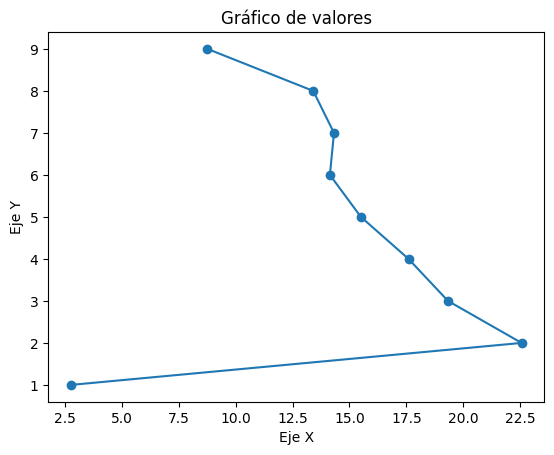

In [5]:

from scipy import stats
import matplotlib.pyplot as plt #Bibioteca para iterar


df = dfBeta.round()

aMean = []
aMedian = []
aMode = []

    # Iterar sobre cada fila 
for index, row in df.iterrows():        
    # Extraer los valores de la fila en un array
    values = row.to_numpy()        
    # Calcular estadísticas
    mean = np.mean(values)
    median = np.median(values)
    mode = stats.mode(values)
    # trend = linregress(np.arange(len(values)), values).slope

    #Redondear valores de los promedios antes de regrezar al archivo json, al valor mas cercano
    #meanRounded = [round_to_closest(number) for number in mean]
    #print("Prmedios redondeados : ",mean," Tipo de dato : ",type(mean))
    mean_rounded = np.around(mean, decimals=2)


        #Guardar valores de arreglos
    aMean.append(mean_rounded)
    aMedian.append(median)
    aMode.append(mode.mode)        

    # print("Sin iterar : ",aMean)

# for i in range(len(aMean)):
#      print("Semestre",i+1,":",aMean[i])

for i,value in enumerate(aMean):
    print("Semestre",i+1,":",value)


# Crear un arreglo de valores
x = np.array(aMean)
y = np.array(range(1,len(aMean)+1))

# Graficar los valores
plt.plot(x, y, marker='o')  # Utilice 'o' para marcar los puntos en el gráfico
plt.xlabel('Eje X')  # Etiqueta del eje X
plt.ylabel('Eje Y')  # Etiqueta del eje Y
#plt.title('Gráfico de valores')  # Título del gráfico
plt.title('Gráfico de valores')  # Título del gráfico
plt.show()  # Mostrar el gráfico




### Calculos con headers y renglones del DataSource

In [31]:
import pandas as pd

# Extraer los encabezados como una lista
headers = list(df.columns) #Extraccion de los encabezados del archivo CSV

# Impresion de arreglo con los encabezados
print(headers)

# Extraer todos los renglones del DataFrame
todos_renglones = df.iloc[:, :] #Extraccion de todos los registros del dataframe

# Extraer todos los renglones del DataFrame como un arreglo
arreglo_renglones = df.values


#Impresion de los valores de cada semestre a lo largo de los periodos
for i,value in enumerate(arreglo_renglones):
    print("Semestre",i+1," : ",value)


# Crear un arreglo de valores
x1 = np.array(arreglo_renglones[0])
y1= np.array(headers)


#LINEA RECTA
# Agregar una línea diagonal en el medio de la tendencia
#plt.plot([x[0], x[-1]], [np.mean(y), np.mean(y)], color='r', linestyle='--')


# Graficar los valores
# plt.plot(x1, y1, marker='o')  # Utilice 'o' para marcar los puntos en el gráfico
# plt.xlabel('Eje X')  # Etiqueta del eje X
# plt.ylabel('Eje Y')  # Etiqueta del eje Y
# plt.title('Gráfico de valores')  # Título del gráfico
# plt.show()  # Mostrar el gráfico


['periodo_1', 'periodo_2', 'periodo_3', 'periodo_4', 'periodo_5', 'periodo_6', 'periodo_7', 'periodo_8', 'periodo_9', 'periodo_10', 'periodo_11', 'periodo_12', 'periodo_13', 'periodo_14', 'periodo_15', 'periodo_16', 'periodo_17', 'periodo_18', 'periodo_19', 'periodo_20', 'periodo_21', 'periodo_22']
Semestre 1  :  [3. 2. 3. 1. 4. 2. 2. 1. 2. 2. 2. 2. 3. 4. 3. 4. 3. 3. 3. 6. 3. 3.]
Semestre 2  :  [15. 24. 19. 19. 19. 32. 14. 26. 22. 25. 24. 25. 20. 22. 21. 22. 24. 30.
 23. 26. 21. 23.]
Semestre 3  :  [18. 19. 22. 18. 18. 18. 24. 14. 13. 15. 21. 19. 21. 18. 19. 18. 20. 19.
 24. 23. 24. 20.]
Semestre 4  :  [12. 13. 17. 18. 18. 18. 17. 23. 22. 13. 12. 17. 16. 18. 18. 18. 19. 20.
 18. 24. 18. 18.]
Semestre 5  :  [18. 14. 12. 12. 12. 17. 18. 16. 18. 12. 18. 12. 18. 12. 17. 12. 18. 18.
 18. 18. 17. 14.]
Semestre 6  :  [14. 12. 12. 12. 12. 12. 14. 18. 14. 14. 12. 17. 12. 12. 12. 12. 12. 18.
 12. 18. 22. 18.]
Semestre 7  :  [14. 14. 12. 13. 14. 12. 12. 12. 19. 12. 13. 10. 16. 10. 18. 13. 18. 12.

### Identificacion de tendencia

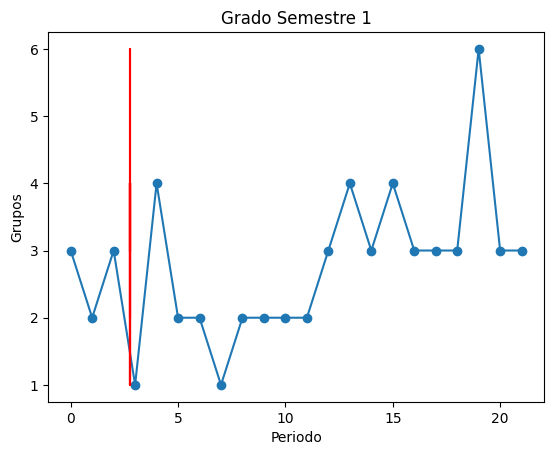

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.stats import polyfit

# Ajustar los datos a una línea de mejor ajuste
coeficientes, covario = np.polyfit(x1.astype("int64"), range(len(y1)), 1)

# Calcular las predicciones utilizando la línea de mejor ajuste
#predicciones = np.poly1d(coeficientes)(x)
predicciones = np.poly1d(coeficientes)(x1.astype("int64"))

# Graficar los valores y la línea de mejor ajuste
#plt.plot(x1.astype("int64"), range(len(y1)), marker='o')
#plt.plot(x1.astype("int64"), predicciones, '-r')  # Utilice '-r' para dibujar la línea de mejor ajuste
plt.plot(range(len(y1)), x1.astype("int64"),  marker='o')
plt.plot(predicciones, x1.astype("int64"),  '-r')  # Utilice '-r' para dibujar la línea de mejor ajuste


# Ajustar el formato de la gráfica para que se vea claramente la tendencia
#plt.xlabel('Eje X')  # Etiqueta del eje X
#plt.ylabel('Eje Y')  # Etiqueta del eje Y
plt.xlabel('Periodo')  # Etiqueta del eje X
plt.ylabel('Grupos')  # Etiqueta del eje Y
#plt.title('Gráfico de valores con tendencia y línea de mejor ajuste')  # Título del gráfico
plt.title('Grado Semestre 1')  # Título del gráfico
plt.show()  # Mostrar el gráfico

### Valores del 1er Semestre

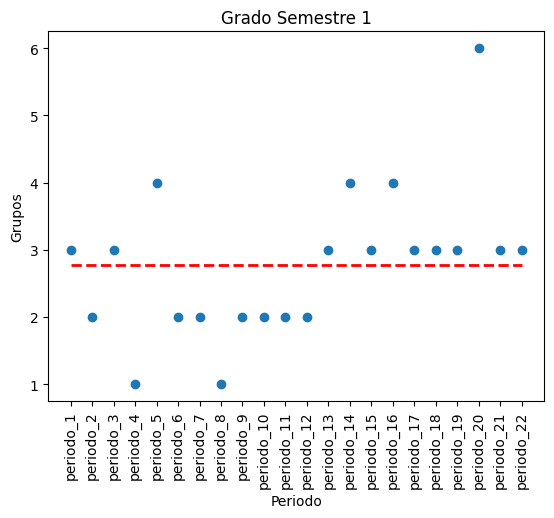

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# x1 = [3, 2, 3, 1, 4, 2, 2, 1, 2, 2, 2, 2, 3, 4, 3, 4, 3, 3, 3, 6, 3, 3]
# y1 = ['periodo_1', 'periodo_2', 'periodo_3', 'periodo_4', 'periodo_5', 'periodo_6', 'periodo_7', 'periodo_8', 'periodo_9', 'periodo_10', 'periodo_11', 'periodo_12', 'periodo_13', 'periodo_14', 'periodo_15', 'periodo_16', 'periodo_17', 'periodo_18', 'periodo_19', 'periodo_20', 'periodo_21', 'periodo_22']

fig = plt.figure(dpi=100)
plt.plot(range(len(x1)), x1, 'o')
media = np.mean(x1)
plt.plot(range(len(x1)), [media]*len(x1), 'r--', linewidth=2)
plt.xticks(range(len(x1)), y1, rotation=90) 
plt.xlabel('Periodo')
plt.ylabel('Grupos')
plt.title('Grado Semestre 1')  
        
plt.show()

- Mostrar la media como una línea punteada para resaltar la tendencia:
- La línea punteada roja marcará la media para identificar la tendencia central.

### Valores del 1er Semestre, marcando la tendencia con sombreado

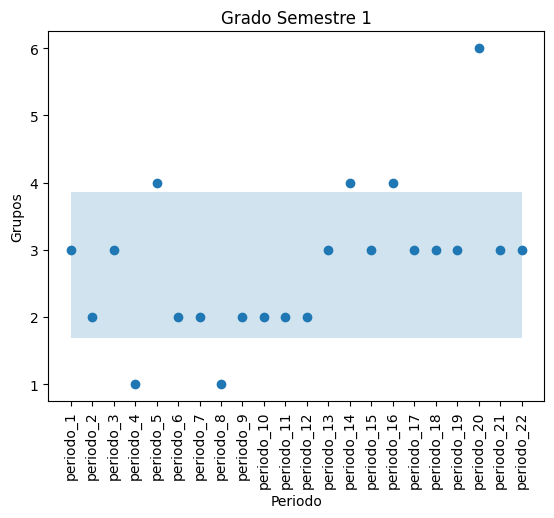

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# x1 = [3, 2, 3, 1, 4, 2, 2, 1, 2, 2, 2, 2, 3, 4, 3, 4, 3, 3, 3, 6, 3, 3] 
# y1 = ['periodo_1', 'periodo_2', 'periodo_3', 'periodo_4', 'periodo_5', 'periodo_6', 'periodo_7', 'periodo_8', 
#        'periodo_9', 'periodo_10', 'periodo_11', 'periodo_12', 'periodo_13', 'periodo_14', 'periodo_15',  
#        'periodo_16', 'periodo_17', 'periodo_18', 'periodo_19', 'periodo_20', 'periodo_21', 'periodo_22']

fig = plt.figure(dpi=100)
plt.plot(range(len(x1)), x1, 'o')

media = np.mean(x1) 
desviacion = np.std(x1)

plt.fill_between(range(len(x1)), media - desviacion,  
                 media + desviacion, alpha=0.2)

plt.xticks(range(len(x1)), y1, rotation=90)  
plt.xlabel('Periodo')
plt.ylabel('Grupos')
plt.title('Grado Semestre 1')  

plt.show()

- De esta forma resaltamos aproximadamente el 68% de los datos alrededor de la media (asumiendo distribución normal), sin que los valores extremos afecten mucho el área sombreada.

El gráfico con el sombreado alrededor de la media y la desviación estándar haya quedado mejor.

Al utilizar medidas estadísticas como la media y desviación estándar podemos resaltar visualmente la tendencia central de los datos, sin que los valores atípicos extremos extiendan demasiado el área sombreada.